# vgrid

Vgrid is a python class for incremental gridding. Grid parameters are established to include the grid node spacing, radius of influence of each grid node and type of grid (mean, median, etc.). Then x,y,z data can be added to the grid incrementally. Vgrid will calculate the griding function for all points falling within the radius of influence of each grid node. The grid grows dynamically to accommodate the extent of the input data. New data can be added with subsequent "adds". Here's an example:

In [35]:
import vgrid
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

First we'll create some test data.

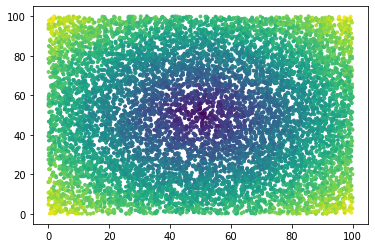

In [56]:
x = np.random.random((10000,1)) * 100
y = np.random.random((10000,1)) * 100
z = np.sqrt((x-50)**2 + (y-50)**2) + np.random.random(x.shape) * 10
plt.scatter(x,y,c=z, s=8)


Now create a mean grid, with grid interval of 5 and a radius of influence of 10. In this example, points are selected randomly in batches of 100 to illustrate the incremental gridding capability. As more points are added a more complete and less noisy grid is created. Note that the grid values, and their standard deviation are accessed through function calls, `G.zz()` and `G.std()` rather than a class member variables. 

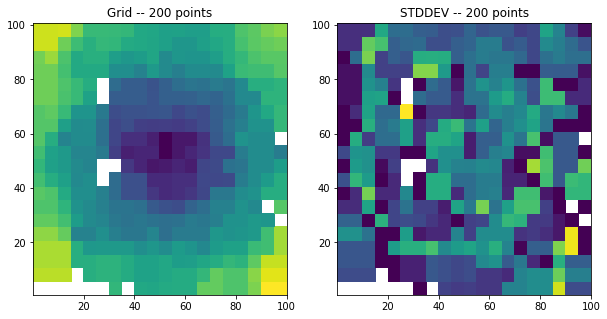

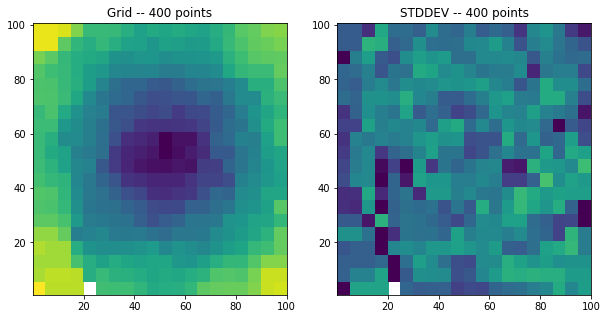

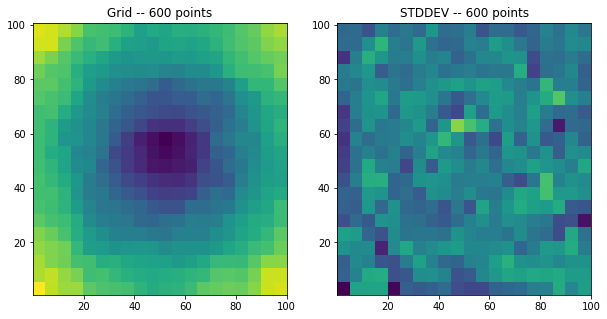

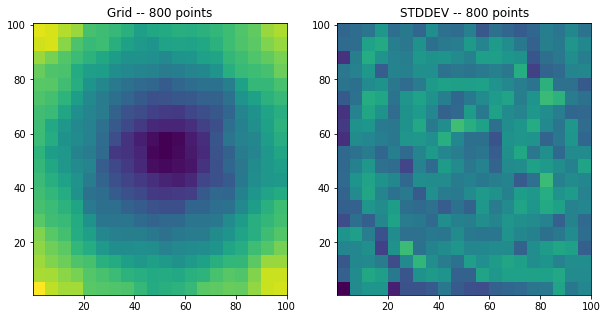

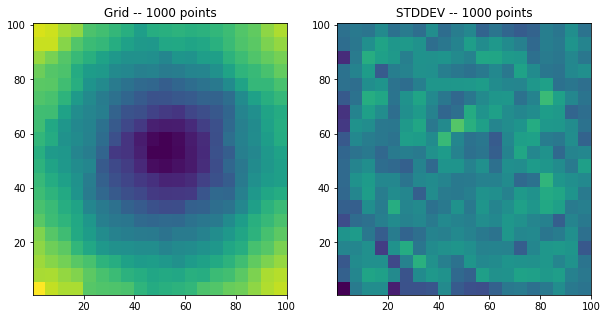

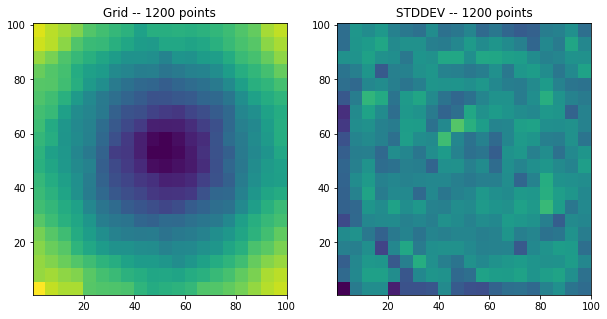

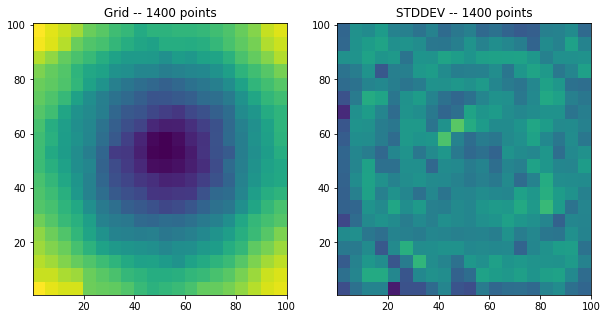

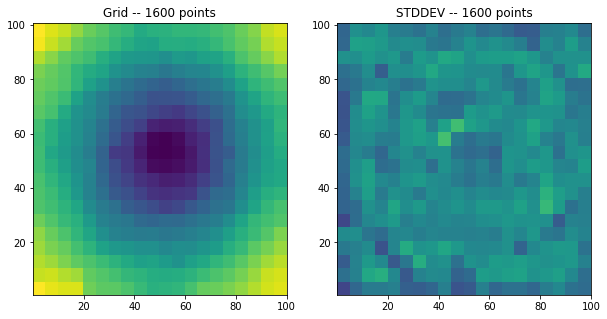

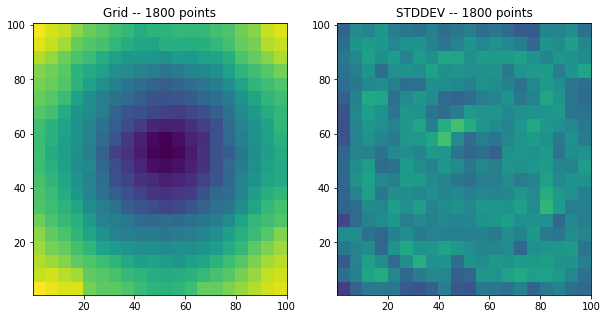

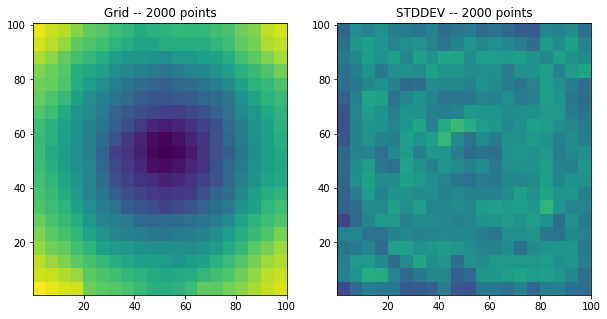

In [65]:
G = vgrid.vgrid(5,10,type='mean')
for q in range(10):
    ii = np.random.randint(0,10000,size=100)
    G.add(x[ii],y[ii],z[ii],1)
    xxx,yyy = np.meshgrid(G.xx,G.yy)
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.pcolor(xxx,yyy,G.zz())
    plt.title("Grid -- " + str((q+1)*200) + ' points')
    plt.subplot(122)
    plt.pcolor(xxx,yyy,G.std())
    if q == 0:
        cmax = np.nanmax(G.std().ravel())
    plt.clim(0,cmax)
    plt.title("STDDEV -- " + str((q+1)*200) + ' points')
    plt.show()

`vgrid` is a work in progress. It is being ported from a MATLAB routine where it runs faster by at least a factor of two. Scipy KDTrees were experimented with but turned out to be slower by a factor of 10. Research is ongoing to speed things up. 

Not all gridding methods found under `G.add()` have been ported yet.  